We first define an the algebra of upper triangular matrix. It is not defined as matrix because we need the element to be expanded as sum of the element of the basis. This should be fixed in matrices but the fix is not completely obvious and need some pervasive design choices.

In [1]:
class UpperTriangularMatrixAlgebra(CombinatorialFreeModule):
    def __init__(self, base_ring, n):
        self._n = n
        basis_keys = [(i,j) for j in range(n)     # the index of the basis
                           for i in range(j+1)]
        CombinatorialFreeModule.__init__(
            self, base_ring, basis_keys,
            category=FiniteDimensionalAlgebrasWithBasis(base_ring))
    def one(self):
        return self.sum_of_monomials((i,i) for i in range(self._n))
    def product_on_basis(self, (i,j), (k,l)):
        if j == k:
            return self.monomial((i,l))
        else:
            return self.zero()

In [2]:
M4 =  UpperTriangularMatrixAlgebra(QQ, 4)

We then ask sage to check that everything is correctly defined in our algebra:

In [3]:
TestSuite(M4).run(verbose=True)

running ._test_additive_associativity() . . . pass
running ._test_an_element() . . . pass
running ._test_associativity() . . . pass
running ._test_cardinality() . . . pass
running ._test_category() . . . pass
running ._test_characteristic() . . . pass
running ._test_distributivity() . . . pass
running ._test_elements() . . .
  Running the test suite of self.an_element()
  running ._test_category() . . . pass
  running ._test_eq() . . . pass
  running ._test_new() . . . pass
  running ._test_nonzero_equal() . . . pass
  running ._test_not_implemented_methods() . . . pass
  running ._test_pickling() . . . pass
  pass
running ._test_elements_eq_reflexive() . . . pass
running ._test_elements_eq_symmetric() . . . pass
running ._test_elements_eq_transitive() . . . pass
running ._test_elements_neq() . . . pass
running ._test_eq() . . . pass
running ._test_new() . . . pass
running ._test_not_implemented_methods() . . . pass
running ._test_one() . . . pass
running ._test_pickling() . . . pass
r

In [4]:
M4.basis()

Finite family {(0, 1): B[(0, 1)], (1, 2): B[(1, 2)], (0, 0): B[(0, 0)], (3, 3): B[(3, 3)], (1, 1): B[(1, 1)], (1, 3): B[(1, 3)], (2, 3): B[(2, 3)], (2, 2): B[(2, 2)], (0, 3): B[(0, 3)], (0, 2): B[(0, 2)]}

Here is how to compute a basis of the radical of M4:

In [5]:
M4.radical_basis()

(B[(0, 1)], B[(0, 2)], B[(1, 2)], B[(0, 3)], B[(1, 3)], B[(2, 3)])

We can look at the source code:

In [34]:
M4.radical_basis??

Asking for the radical itself is not very informative:

In [6]:
M4.radical()

Radical of Free module generated by {(0, 0), (0, 1), (1, 1), (0, 2), (1, 2), (2, 2), (0, 3), (1, 3), (2, 3), (3, 3)} over Rational Field

In [35]:
M4.radical().basis()

Finite family {0: B[0], 1: B[1], 2: B[2], 3: B[3], 4: B[4], 5: B[5]}

Element of the radical are expressed in a specific basis of the radical itself:

In [43]:
el = M4.radical().basis().an_element()
el

B[0]

To recover the corresponding element expressed in the basis of the algebra, one has to `lift` it:

In [44]:
M4.radical().basis().an_element().lift()

B[(0, 1)]

Let us compute the iterated radicals

In [45]:
Rad = M4.radical()
Rad2basis = M4.echelon_form([x.lift()*y.lift()
                            for x in Rad.basis() for y in Rad.basis()])
Rad2 = M4.submodule(Rad2basis)

In [46]:
Rad2basis

[B[(0, 2)], B[(0, 3)], B[(1, 3)]]

In [47]:
Rad3basis = M4.echelon_form([x.lift()*y.lift()
                            for x in Rad2.basis() for y in Rad.basis()])
Rad3 = M4.submodule(Rad3basis)

In [48]:
Rad3basis

[B[(0, 3)]]

In [49]:
Rad4basis = M4.echelon_form([x.lift()*y.lift()
                            for x in Rad3.basis() for y in Rad.basis()])
Rad4 = M4.submodule(Rad4basis)

In [50]:
Rad4

Free module generated by {} over Rational Field

### Computing the decomposition of the identity

In the case of triangular matrices we get the diagonal elements:

In [13]:
Idms = M4.orthogonal_idempotents_central_mod_radical()
Idms

(B[(0, 0)], B[(1, 1)], B[(2, 2)], B[(3, 3)])

Let's perform some check

In [51]:
[e*e-e for e in Idms]

[0, 0, 0, 0]

In [52]:
[e*f for e in Idms for f in Idms if e != f]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

### Doing some linear algebra

Doing linear algebra in an algebra with basis is currently a little bit impractical: we need to convert our elements to vectors and apply gaussian elimination. We first need to get the space for the vector associated to this algebra:

In [14]:
V = M4.one().to_vector().parent()
V

Vector space of dimension 10 over Rational Field

In [15]:
Radv = [x.lift().to_vector() for x in Rad.basis()]
RadV = V.submodule(Radv)

Rad2v = [x.lift().to_vector() for x in Rad2.basis()]
Rad2V = V.submodule(Rad2v)

RadV, Rad2V

(Vector space of degree 10 and dimension 6 over Rational Field
 Basis matrix:
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0],
 Vector space of degree 10 and dimension 3 over Rational Field
 Basis matrix:
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0])

In [16]:
@cached_function
def quiver_space(ei, ej):
    A = ei.parent()
    V = A.one().to_vector().parent()
    
    Rad = A.radical()
    
    Radv = [x.lift().to_vector() for x in Rad.basis()]
    RadV = V.submodule(Radv)

    Rad2basis = A.echelon_form(
        [x.lift()*y.lift() for x in Rad.basis() for y in Rad.basis()])

    Rad2v = [x.to_vector() for x in Rad2basis]
    Rad2V = V.submodule(Rad2v)
    
    PS = A.peirce_summand(ei,ej)

    PSv = [x.lift().to_vector() for x in PS.basis()]
    PSV = V.submodule(PSv)

    PSrad = PSV.intersection(RadV)
    PSrad2 = PSV.intersection(Rad2V)
    return PSrad.quotient(PSrad2)

In [17]:
Idms

(B[(0, 0)], B[(1, 1)], B[(2, 2)], B[(3, 3)])

In [18]:
@cached_function
def quiver(A):
    Idms = A.orthogonal_idempotents_central_mod_radical()
    res = dict()
    for i, ei in enumerate(Idms):
        di = dict()
        for j, ej in enumerate(Idms):
            sp = quiver_space(ei, ej)
            spd = sp.dimension()
            if spd != 0:
                di[j] = ['f_%s_%s_%s'%(i, j, k) for k in range(spd)]
        res[i] = di
    return DiGraph(res)


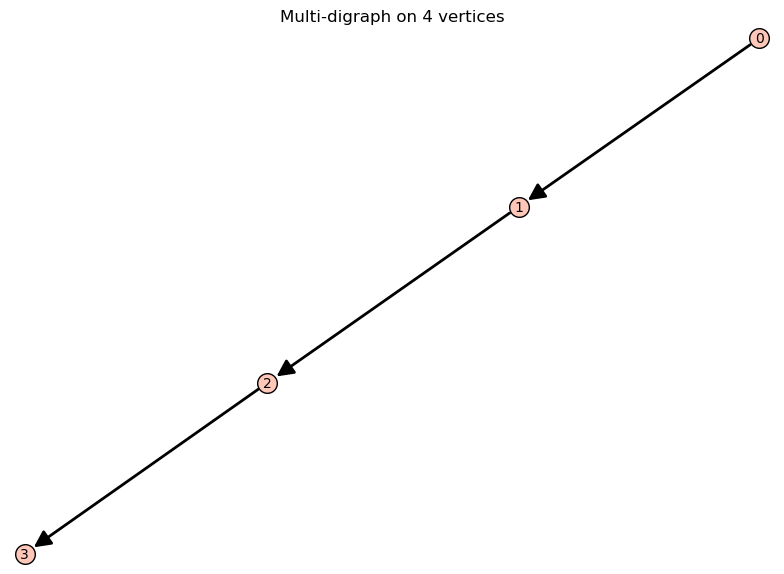

In [19]:
quiver(M4)

In [20]:
from sage.monoids.hecke_monoid import HeckeMonoid
A = HeckeMonoid(SymmetricGroup(4)).algebra(QQ)
A.rename("My favoutite algebra")
# Fix the printing of the elements
def print_el(m):
    m = m.lift()
    return "T"+"".join(str(i) for i in m(m.domain()[0]).tuple())
A._repr_term = print_el

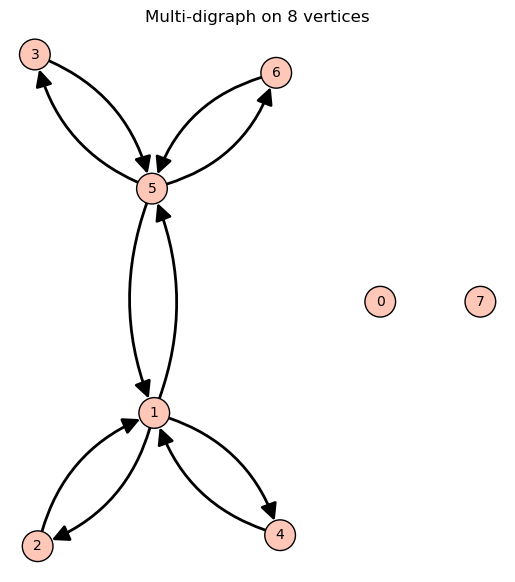

In [21]:
quiver(A)

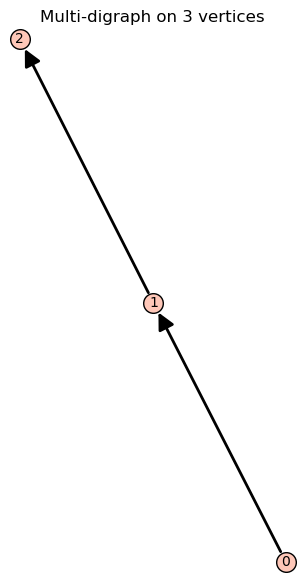

In [22]:
quiver(UpperTriangularMatrixAlgebra(QQ,3))

In [27]:
Q = quiver(HeckeMonoid(SymmetricGroup(5)).algebra(QQ))

In [29]:
Q.set_latex_options(format="dot2tex")
view(Q)